In [18]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/jwidjaja02/ALP-Data-Mining-Jason-Widjaja/main/Dataset_Terapi_Kelenjar_Getah_Bening.csv")
df

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,1,15,11.00,6.0,1.0,30,25.0,0
1,1,27,11.75,NaN,1.0,208,6.0,0
2,1,32,12.00,9.0,1.0,43,50.0,0
3,1,33,1.75,7.0,2.0,379,7.0,0
4,1,34,5.00,7.0,3.0,64,7.0,0
...,...,...,...,...,...,...,...,...
85,2,51,4.00,1.0,1.0,65,7.0,1
86,2,51,6.00,6.0,NaN,80,2.0,1
87,2,52,2.25,5.0,1.0,63,7.0,1
88,2,53,10.00,1.0,2.0,30,25.0,1


# EDA

In [19]:
df.describe()

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
count,90.000000,90.000000,87.000000,89.000000,85.000000,90.000000,88.000000,90.000000
mean,1.544444,31.044444,7.221264,6.123596,1.752941,95.700000,14.500000,0.788889
std,0.500811,12.235435,3.151325,4.231431,0.829599,136.614643,17.378147,0.410383
min,1.000000,15.000000,1.000000,1.000000,1.000000,6.000000,2.000000,0.000000
25%,1.000000,20.250000,5.000000,2.000000,1.000000,35.500000,5.000000,1.000000
50%,2.000000,28.500000,7.750000,6.000000,2.000000,53.000000,7.000000,1.000000
75%,2.000000,41.750000,10.000000,9.000000,2.000000,80.750000,9.000000,1.000000
max,2.000000,56.000000,12.000000,19.000000,3.000000,900.000000,70.000000,1.000000


In [20]:
df.isnull().sum()

gender                 0
age                    0
Time                   3
Number_of_Warts        1
Type                   5
Area                   0
induration_diameter    2
Result_of_Treatment    0
dtype: int64

In [21]:
df.duplicated().sum()

0

# Mengisi Missing Value

In [22]:
import math

df["Time"].fillna(math.floor(df["Time"].mean()), inplace=True)
df["induration_diameter"].fillna(math.floor(df["induration_diameter"].mean()), inplace=True)
df["Number_of_Warts"].fillna(math.floor(df["Number_of_Warts"].mean()), inplace=True)
df["Type"].fillna(math.floor(df["Type"].mean()), inplace=True)

df.isnull().sum()

gender                 0
age                    0
Time                   0
Number_of_Warts        0
Type                   0
Area                   0
induration_diameter    0
Result_of_Treatment    0
dtype: int64

# Memeriksa Ketimpangan

In [23]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


C:\Users\JASON\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Result_of_Treatment', ylabel='count'>

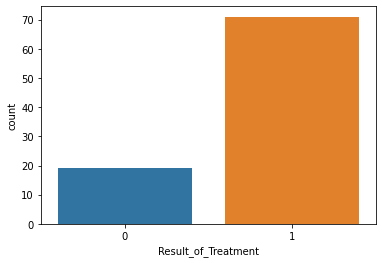

In [24]:
import seaborn as sns

sns.countplot(df['Result_of_Treatment'])

# Memperbaiki Ketimpangan dengan metode SMOTE

C:\Users\JASON\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Result_of_Treatment', ylabel='count'>

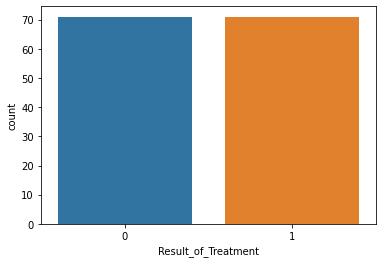

In [25]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X = df[['gender', 'age', 'Number_of_Warts', 'Area', 'induration_diameter','Type', 'Time']]
y = df['Result_of_Treatment']
X_smote, y_smote = smote.fit_resample(X, y)
df = pd.DataFrame(X_smote)
df["Result_of_Treatment"] = y_smote
sns.countplot(df['Result_of_Treatment'])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               142 non-null    int64  
 1   age                  142 non-null    int64  
 2   Number_of_Warts      142 non-null    float64
 3   Area                 142 non-null    int64  
 4   induration_diameter  142 non-null    float64
 5   Type                 142 non-null    float64
 6   Time                 142 non-null    float64
 7   Result_of_Treatment  142 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 9.0 KB


# Linear Regression

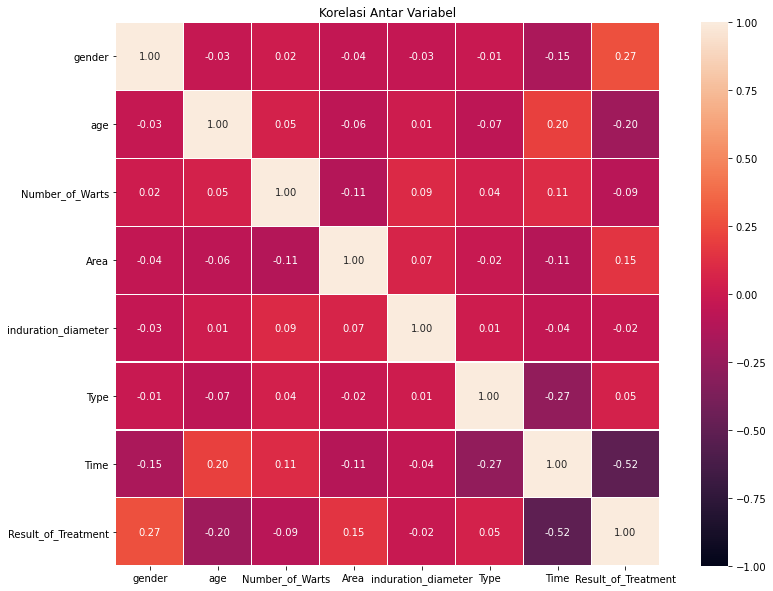

In [27]:
import matplotlib.pyplot as plt

corr = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, fmt='.2f', linewidths=0.1, square = True)
plt.title("Korelasi Antar Variabel")
plt.show()

In [28]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

X = df[['Time','Number_of_Warts','induration_diameter','gender']]
y = df['age']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 25)

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print("Root Mean Squared Error (RMSE): ", np.sqrt(mean_squared_error(y_test, y_pred)))

LR_MAPE= mean_absolute_percentage_error(y_test, y_pred)*100
print("MAPE: ",LR_MAPE)
print(lr.score(X_test, y_test))

Root Mean Squared Error (RMSE):  9.563106096190099
MAPE:  31.37745835251966
0.04861362424111093


In [29]:
perbandingan = pd.DataFrame({'y_test':y_test ,'y_pred':y_pred})
perbandingan

,y_test,y_pred
69,24,30.054538
113,37,34.969144
105,31,30.598264
125,39,33.441742
26,20,31.646169
97,44,33.929891
79,46,31.814167
100,32,35.749192
107,40,30.661644
6,45,33.762031


# Classification Decision Tree

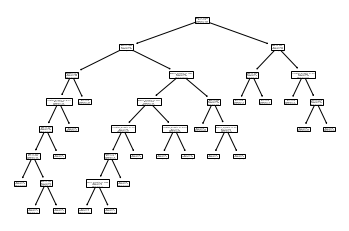

In [30]:
from sklearn import tree
from sklearn import preprocessing

features = ['gender', 'age', 'Number_of_Warts', 'Area', 'induration_diameter','Type', 'Time']
X = df[['gender', 'age', 'Number_of_Warts', 'Area', 'induration_diameter','Type', 'Time']]
y = df['Result_of_Treatment']

model = tree.DecisionTreeClassifier()
model1 = model.fit(X, y)

tree.plot_tree(model1, feature_names=features)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 25)

y_pred = model1.predict(X_test)

In [31]:
print("Root Mean Squared Error (RMSE): ", np.sqrt(mean_squared_error(y_test, y_pred)))

LR_MAPE= mean_absolute_percentage_error(y_test, y_pred)*100
print("MAPE: ",LR_MAPE)
print(model1.score(X_test, y_test))

Root Mean Squared Error (RMSE):  0.0
MAPE:  0.0
1.0


In [32]:
perbandingan = pd.DataFrame({'y_test':y_test ,'y_pred':y_pred})
perbandingan

,y_test,y_pred
69,1,1
113,0,0
105,0,0
125,0,0
26,1,1
97,0,0
79,1,1
100,0,0
107,0,0
6,0,0


# Clustering K-Mean

In [35]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
standardized_data = sc.fit_transform(df)
standardized_data

array([[-0.84311528, -1.58174348, -0.09943231, ..., -0.90359763,
         0.93334565, -1.        ],
       [-0.84311528, -0.46890661, -0.09943231, ..., -0.90359763,
         1.18215717, -1.        ],
       [-0.84311528, -0.00522459,  0.71975386, ..., -0.90359763,
         1.26509434, -1.        ],
       ...,
       [-0.84311528, -0.09796099,  0.08590684, ...,  0.83718844,
        -0.47097653, -1.        ],
       [-0.84311528,  0.18024823,  0.31089647, ...,  1.47693894,
        -0.89037835, -1.        ],
       [-0.84311528,  1.20034869, -0.18572672, ..., -0.37868893,
        -0.34035412, -1.        ]])

In [37]:
df= pd.DataFrame(standardized_data,columns=['gender','age','Time','Number_of_Warts','Type','area','induration_diameter','Result_of_Treatment'])
df.isnull().sum()

gender                 0
age                    0
Time                   0
Number_of_Warts        0
Type                   0
area                   0
induration_diameter    0
Result_of_Treatment    0
dtype: int64

In [40]:
from sklearn.cluster import KMeans
wcss = [] 

for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

C:\Users\JASON\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\JASON\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\JASON\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\JASON\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Window

In [41]:
from kneed import KneeLocator
kn = KneeLocator(range(1,11),wcss, curve='convex', direction='decreasing')
print('the optimal k is ',kn.knee)

the optimal k is  4


In [44]:
X = df
kmeans = KMeans(init='random',n_clusters = 4, n_init = 300, random_state = 1).fit(X)
kmeans.labels_

C:\Users\JASON\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 3, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 3,
       2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 3, 1, 2, 2, 1, 1, 3, 2, 2, 1, 1, 1,
       1, 2, 3, 1, 0, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 3,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 3, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [48]:
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

df['KMeans_Clusters'] = y_kmeans

df.groupby("KMeans_Clusters").agg(Gender = ('gender', pd.Series.mode), 
                          Age = ('age', 'mean'), 
                          Time = ('Time', 'mean'), 
                          Warts_Count = ('Number_of_Warts', 'mean'), 
                          Type = ('Type', pd.Series.mode), 
                          Area = ('area', 'mean'), 
                          Induration_Diameter = ('induration_diameter', 'mean'), 
                          Treatment_Result = ('Result_of_Treatment', pd.Series.mode), 
                          Count = ('KMeans_Clusters', 'count'))

C:\Users\JASON\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Gender,Age,Time,Warts_Count,Type,Area,Induration_Diameter,Treatment_Result,Count
KMeans_Clusters,,,,,,,,,
0,-0.843115,0.270174,0.122495,-0.189469,2.215200,-0.145181,0.678020,-1.0,66
1,1.186077,-0.272124,-0.616024,-0.217111,-0.472872,-0.487201,-0.304563,1.0,41
2,-0.843115,-0.214740,0.685701,-0.264591,-0.472872,1.172466,-1.075190,1.0,27
3,-0.843115,-0.109553,-0.167698,3.568806,-0.472872,-0.262418,-0.404016,1.0,8


In [49]:
from sklearn.metrics import silhouette_score

silhouette_score(X,y_kmeans)

0.24440911318753342